In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model

sklearn.linear_model.__all__

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'QuantileRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SGDOneClassSVM',
 'SquaredLoss',
 'TheilSenRegressor',
 'enet_path',
 'lars_path',
 'lars_path_gram',
 'lasso_path',
 'orthogonal_mp',
 'orthogonal_mp_gram',
 'ridge_regression',
 'RANSACRegressor',
 'PoissonRegressor',
 'GammaRegressor',
 'TweedieRegressor']

In [5]:
xigua = pd.read_csv("../data/xigua3.0.csv")
xigua

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [9]:
xigua['好瓜'] = xigua['好瓜'].replace({"是": 1, "否": 0})
xigua

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,1
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,1
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,1
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,1
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,1
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,1
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,1
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,1
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,0
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,0


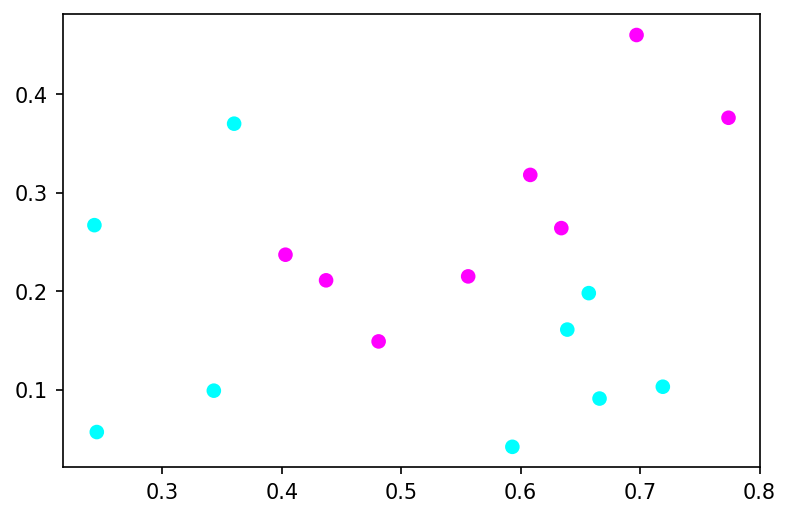

In [10]:
plt.rcParams['figure.dpi'] = 150
plt.scatter(xigua['密度'], xigua['含糖率'], c=xigua['好瓜'], cmap='cool')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
xy = train_test_split(xigua['密度'], xigua['含糖率'])
xy[0].shape,xy[1].shape,xy[2].shape,xy[3].shape

((12,), (5,), (12,), (5,))

In [30]:
print(xy[0])

16    0.719
11    0.343
7     0.437
10    0.245
4     0.556
3     0.608
0     0.697
2     0.634
1     0.774
15    0.593
14    0.360
5     0.403
Name: 密度, dtype: float64


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #(12,1) [[1],[2],[3]] [1,2,3]
model.fit(xy[0].values.reshape(-1,1), xy[2])
model.score(xy[1].values.reshape(-1,1), xy[3])

-3.0774850239331046

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


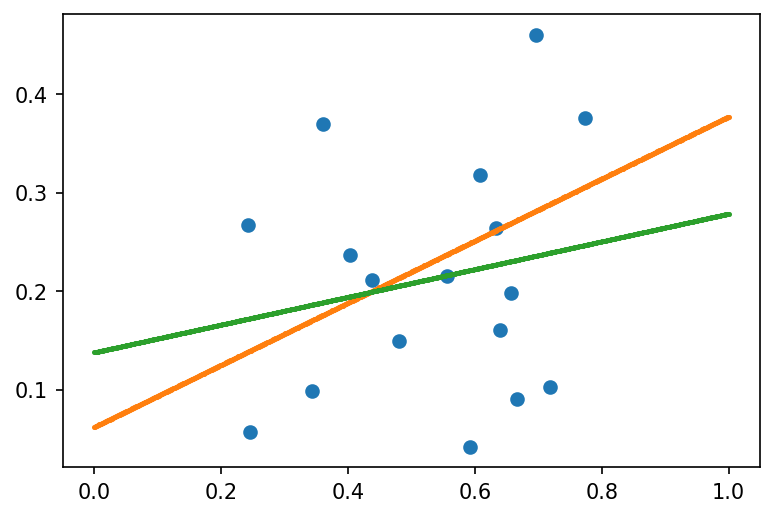

In [36]:
x_plot = np.linspace(0, 1.0, 1000).reshape(-1,1)
y_predict = model.predict(x_plot)
model = LinearRegression()
model.fit(xigua[['密度']], xigua['含糖率'])
model.score(xigua[['密度']], xigua['含糖率'])
y_predict_2 = model.predict(x_plot)
plt.rcParams['figure.dpi'] = 150
plt.scatter(xigua['密度'], xigua['含糖率'])
plt.scatter(x_plot, y_predict, s=2)
plt.scatter(x_plot, y_predict_2, s=2)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
xy = train_test_split(xigua[['密度','含糖率']], xigua['好瓜'])
xy[0].shape,xy[1].shape,xy[2].shape,xy[3].shape

((12, 2), (5, 2), (12,), (5,))

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xy[0], xy[2])
model.score(xy[1], xy[3])

0.8

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


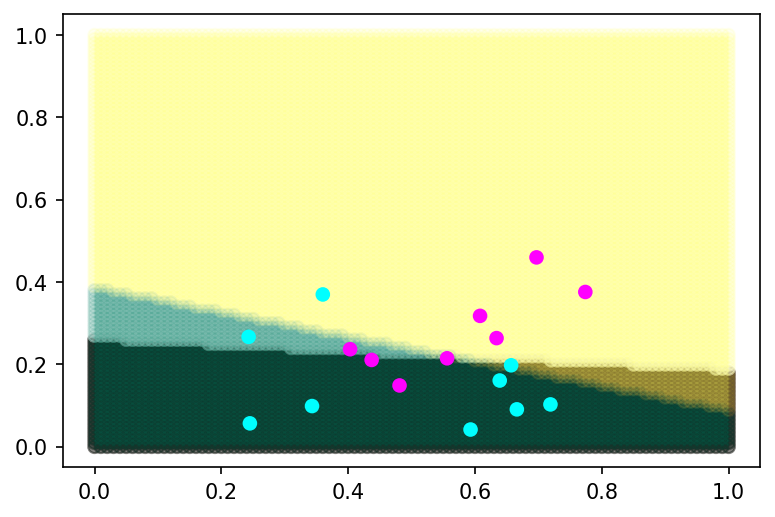

In [47]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
x, y = np.meshgrid(x,y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_predict = model.predict(disp_input)
model2 = LogisticRegression(C=50, tol=1e-6, max_iter=100000)
model2.fit(xigua[['密度','含糖率']], xigua['好瓜'])
disp_predict2 = model2.predict(disp_input)
plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='pink', alpha=0.5)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict2, cmap='summer', alpha=0.1)
plt.scatter(xigua['密度'], xigua['含糖率'], c=xigua['好瓜'], cmap='cool')
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
cross_val_score(model, xigua[['密度','含糖率']], xigua['好瓜'], cv=5, scoring='accuracy').mean()

0.3333333333333333

In [50]:
model = LogisticRegression(C=50)
cross_val_score(model, xigua[['密度','含糖率']], xigua['好瓜'], cv=5, scoring='accuracy').mean()

0.4833333333333334

In [52]:
model = LinearRegression()
cross_val_score(model, xigua[['密度']], xigua['含糖率'], cv=5, scoring='r2').mean()

-2.781209419355487